<a href="https://colab.research.google.com/github/Fulea-Andrei/ProjectInfoVisualizationCourse/blob/main/info_visualization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
completed_websites_dataset = pd.read_csv("https://raw.githubusercontent.com/Fulea-Andrei/ProjectInfoVisualizationCourse/main/national_real_estate_data.csv",index_col=0,low_memory=False)
print(completed_websites_dataset.shape, completed_websites_dataset.columns)
national_real_estate_data = completed_websites_dataset

(45015, 29) Index(['price', 'assetstate', 'warmingsystem', 'disponibility', 'colector',
       'title', 'description', 'facilities', 'compartimentation', 'rooms',
       'yearconstruction', 'confort', 'area', 'pagenumber', 'dateposted',
       'town', 'parking', 'assettype', 'transactiontype', 'orientation',
       'neighborhood', 'balcony', 'furnished', 'floor', 'parkingplaces',
       'posteddate', 'link', 'squaremetres', 'bathrooms'],
      dtype='object')


to do : functii de mapare a valorilor si curatare a datelor :
 - price - de curatat pret, sa ramana doar pretu euro
 - asset state - de mapat
 - coelctor -de mapat
 - compartimentation - de mapat
 - rooms - de curatat, sa ramana doar numarul de camere, eventual in int
 - yearconstruction -  de curatat, sa ramana doar anul, eventual in int
 - confort - de mapat
 - balcony - de curatat, sa ramanam doar numarul de balcoane, nan = 0
 - furnished - de mapat
 - square metres -  de curatat, sa ramana doar numarul, eventual in int

In [13]:
class CleaningDataSet():
  def __init__(self, data_frame):
    self.data_frame = data_frame

  def assetstate_map(self):
    #Harta de mapare
    #[nan, 'În construcție', 'Bună', 'Rezonabilă', 'Nouă', 'De renovat', 'Renovată']
    #[0,1,2,3,4,5,6]
    assetstate_map = []
    assetstate_list = []
    assetstate_list_map = []
    assetstate_map = list(set(self.data_frame['assetstate'].values))
    assetstate_list = list(self.data_frame['assetstate'].values)
    for i in assetstate_list:
        if i in assetstate_map:
            assetstate_list_map.append(assetstate_map.index(i))
            
    return assetstate_list_map



  def colector_map(self):
    #Harta de mapare
    #['lajumate', 'imopedia', 'Vdi', 'regata', 'imobiliare', 'remax']
    #[0,1,2,3,4,5]
    colector_map = []
    colector_list = []
    colector_list_map = []
    colector_map = list(set(self.data_frame['colector'].values))
    colector_list = list(self.data_frame['colector'].values)
    for i in colector_list:
        if i in colector_map:
            colector_list_map.append(colector_map.index(i))
            
    return colector_list_map

  def compartimentation_map(self):
    #[nan, 'semidecomandat', 'decomandat', 'open space', 'circular', 'vagon', 'Nedecomandat', 'Semidecomandat', 
    #'semi-decomandat', 'comandat', 'Decomandat', 'Vagon', '5', 'nedecomandat', '10', '7', 'decomandat; det_comp1',
    #'Circular']
    
    #Harta de mapare dupa ce am combinat elementele de genul: semidecomandat si semi-decomandat
    #{nan, 'Comandat', 'open space', 'Semidecomandat', 'Decomandat', 'Vagon', '5', '10', '7', 'Circular'}
    #[0,1,2,3,4,5,6,7,8,9]
    
    aux_wrong_list = ['semidecomandat','decomandat','circular','vagon','Nedecomandat','semi-decomandat','comandat','decomandat; det_comp1','nedecomandat']
    aux_right_list = ['Semidecomandat','Decomandat','Circular','Vagon','Comandat','Semidecomandat','Comandat','Decomandat','Comandat']
    compartimentation_map = []
    compartimentation_list = []
    compartimentation_list_map = []
    compartimentation_list = list(self.data_frame['compartimentation'].values)
    
    for i,elem in enumerate(compartimentation_list):
        if elem in aux_wrong_list:
            compartimentation_list[i] = aux_right_list[aux_wrong_list.index(elem)] 
        
    
    compartimentation_map = list(set(compartimentation_list))
    for i in compartimentation_list:
        if i in compartimentation_map:
            compartimentation_list_map.append(compartimentation_map.index(i))
            
    return compartimentation_list_map

  def confort_map(self):
    #[nan, 'Lux', '2', 'lux', '1', '3']
    #Harta de mapare dupa ce am combinat elementele Lux si lux
    #[nan, 'Lux', '2', '1', '3']
    #[0,1,2,3,4]
    
    confort_map = []
    confort_list = []
    confort_list_map = []
    confort_list = list(self.data_frame['confort'].values)
    
    for i,elem in enumerate(confort_list):
        if elem == 'lux':
            confort_list[i] = 'Lux' 
        
    confort_map = list(set(confort_list))
    for i in confort_list:
        if i in confort_map:
            confort_list_map.append(confort_map.index(i))
            
    return confort_list_map

  def furnished_map(self):
    #[nan, 'Mobilat', 'mobilat; lux', 'mobilare la cerere', 'mobilat', 'semi-mobilat', 'nespecificat',
    #'mobilat; det_mobila6', 'nemobilat']
    
    #Harta de mapare
    #[nan, 'Mobilat', 'mobilat; lux', 'mobilare la cerere', 'semi-mobilat', 'nespecificat', 'nemobilat']
    #[0,1,2,3,4,5,6]
    
    furnished_map = []
    furnished_list = []
    furnished_list_map = []
    furnished_list = list(self.data_frame['furnished'].values)
    
    for i,elem in enumerate(furnished_list):
        if elem == 'mobilat' or elem == 'mobilat; det_mobila6':
            furnished_list[i] = 'Mobilat' 
               
    furnished_map = list(set(furnished_list))
    for i in furnished_list:
        if i in furnished_map:
            furnished_list_map.append(furnished_map.index(i))
            
    return furnished_list_map


  def rooms_cleaning(self):
    #[nan, '5.0', '10', '22.0', '1', '9', '5', '3 camere', '6', '2', '2 camere', '6.0', 'mai mult de 5', 
    #'5 camere', '3.0', '2.0', '1 camera', '13', '7', '3', '6 camere', '4 camere', '4.0', '4', '8']
    
    #Am considerat 5 cazuri posibile si am facut transformarile pe fiecare in parte, la final am transformat in int
    
    rooms_list_cleaned = []
    rooms_list = list(self.data_frame['rooms'].values)
    for i,elem in enumerate(rooms_list):
        if type(elem) is float:
            rooms_list_cleaned.append("0")
        elif len(elem) == 1 or len(elem) == 2: 
            rooms_list_cleaned.append(elem)
        elif len(elem) == 3 or len(elem) == 4: 
            lst_split = elem.split(".")
            rooms_list_cleaned.append(lst_split[0])
        elif len(elem) > 4 and len(elem) < 10:
            lst_split = elem.split()
            rooms_list_cleaned.append(lst_split[0])
        elif len(elem) > 9:
            lst_split = elem.split()
            rooms_list_cleaned.append(lst_split[-1])
            
    rooms_list_cleaned_int = [int(x) for x in rooms_list_cleaned]         
    return rooms_list_cleaned_int 

  def balcony_cleaning(self):
    #le-am facut si pe astea int
    balcony_list_cleaned = []
    balcony_list = list(self.data_frame['balcony'].values)
    for elem in balcony_list:
        if type(elem) is float:
            balcony_list_cleaned.append("0")
        else:
            balcony_list_cleaned.append(elem[0])
    
    balcony_list_cleaned_int = [int(x) for x in balcony_list_cleaned] 
    return balcony_list_cleaned_int

  def squaremetres_cleaning(self):
    #le-am facut float
    squaremetres_list_cleaned = []
    squaremetres_list = list(self.data_frame['squaremetres'].values)
    for elem in squaremetres_list:
        if type(elem) == float:                                        
            squaremetres_list_cleaned.append("0")
        elif type(elem) == str:
            if "," in elem and "." not in elem and " " in elem:   #98,2 mp
                elem = elem.replace(",", ".")
                lst_split = elem.split()
                squaremetres_list_cleaned.append(lst_split[0])
            elif "," in elem and "." not in elem and " " not in elem:   #98,2
                elem = elem.replace(",",".")
                squaremetres_list_cleaned.append(elem)    
            elif "," not in elem and "." in elem and " " in elem:    #98.2 mp      
                lst_split = elem.split()
                squaremetres_list_cleaned.append(lst_split[0])
            elif "," not in elem and "." in elem and " " not in elem:   #98.2
                squaremetres_list_cleaned.append(elem)    
            elif "," not in elem and "." not in elem and " " in elem:  #98 mp    
                lst_split = elem.split()
                squaremetres_list_cleaned.append(lst_split[0])    
        
    squaremetres_list_cleaned_float =  [float(x) for x in squaremetres_list_cleaned] 
    return squaremetres_list_cleaned_float

  def yearconstruction_cleaning(self):
    #le-am facut int 
    yearconstruction_list_cleaned = []
    yearconstruction_list_cleaned_int = []
    test = []
    yearconstruction_list = list(self.data_frame['yearconstruction'].values)
    for elem in yearconstruction_list: 
        if type(elem) == float:   #nan                                     
            yearconstruction_list_cleaned.append("0")
        elif type(elem) == str:
            if "." not in elem and len(elem) == 4:   #1998
                yearconstruction_list_cleaned.append(elem)
            elif "." in elem and " " not in elem:   #1998.0
                lst_split = elem.split('.')
                yearconstruction_list_cleaned.append(lst_split[0])    
            elif "-" in elem and " " not in elem:    #1990-1998      
                lst_split = elem.split('-')
                yearconstruction_list_cleaned.append(lst_split[1])
            elif "(" in elem and ")" in elem and " " in elem:   #1998 (in constructie)
                lst_split = elem.split()
                yearconstruction_list_cleaned.append(lst_split[0])    
            elif "şi" in elem and "(" not in elem and ")" not in elem:  #intre 1998 si 1998    
                lst_split = elem.split()
                yearconstruction_list_cleaned.append(lst_split[-1])
            elif "de" in elem and "(" not in elem and ")" not in elem:  #inainte de 1998    
                lst_split = elem.split()
                yearconstruction_list_cleaned.append(lst_split[-1]) 
            else:
                test.append(elem)
    #print(test)    
    yearconstruction_list_cleaned_int =  [int(x) for x in yearconstruction_list_cleaned] 
    return yearconstruction_list_cleaned_int

  def price_cleaning(self):
    price_list = []
    price_list_cleaned = []
    price_list_cleaned_int = []
    ramase = []
    price_list = list(self.data_frame['price'].values)
    
    listuta=[]
    listuta = self.squaremetres_cleaning()
    
    for i,elem in enumerate(price_list):
        if type(elem) == float:
            price_list_cleaned.append("0")
        elif type(elem) == str:         
            if ("€" in elem or "EUR" in elem or "€;" in elem) and ("RON" not in elem and "€/mp" not in elem):    
                list_split = elem.split()
                price_list_cleaned.append(list_split[0].replace(".",""))
                continue
            elif "," in elem and "EUR" in elem:
                price_list_cleaned.append("0")
            elif elem == "bar_chart":
                price_list_cleaned.append("0")
                continue
            elif elem.replace(".", "").isnumeric():
                price_list_cleaned.append(elem.replace(".",""))
                continue
            elif "LEI" in elem:
                list_split = elem.split()
                price_list_cleaned.append(list_split[0].replace(".",""))
                continue
            elif "chart" in elem and "'\'" in elem:
                list_split = elem.split()
                price_list_cleaned.append(list_split[0].replace(".","")) 
                continue
            elif "RON" in elem and "USD" in elem and "EUR" in elem:
                aux1 = elem.split("D")
                aux2 = aux1[1].split()
                price_list_cleaned.append(aux2[0].replace(".",""))
                continue
            elif "RON" in elem and "USD" in elem and "EUR" not in elem: 
                aux1 = elem.split("N")
                aux2 = aux1[1].split()
                aux3 = aux2[0].replace(".", "")
                aux3 = int(aux3)
                aux3 = aux3 * .9
                aux3 = round(aux3)
                price_list_cleaned.append(str(aux3).replace(".","")) 
                continue
            elif "ron" in elem:
                price_list_cleaned.append("0")
                continue
            else:
                list_split = elem.split()
                metri = str(round(listuta[i]))
                pret = int(list_split[0].replace(".","")) * int(metri.replace(".",""))
                price_list_cleaned.append(str(pret).replace(".",""))
    
    #print(ramase)
    price_list_cleaned_int =  [int("0") if "," in x else int(x) for x in price_list_cleaned]            
    return price_list_cleaned_int    

aplicarea functionalitatilor de curatare a datelor si generarea unui nou data set 

In [14]:
datasetCleanerObject = CleaningDataSet(national_real_estate_data)

assetStateMap = datasetCleanerObject.assetstate_map()
colectorMap = datasetCleanerObject.colector_map()
compartimentationMap = datasetCleanerObject.compartimentation_map()
confortMap = datasetCleanerObject.confort_map()
furnishedMap = datasetCleanerObject.furnished_map()
roomsCleaning = datasetCleanerObject.rooms_cleaning()
balconyCleaning = datasetCleanerObject.balcony_cleaning()
smCleaning = datasetCleanerObject.squaremetres_cleaning()
ycCleaning = datasetCleanerObject.yearconstruction_cleaning()
priceCleaning = datasetCleanerObject.price_cleaning()

national_real_estate_data_CLEANED = national_real_estate_data.copy()

national_real_estate_data_CLEANED['assetstate'] = assetStateMap
national_real_estate_data_CLEANED['colector'] = colectorMap
national_real_estate_data_CLEANED['compartimentation'] = compartimentationMap
national_real_estate_data_CLEANED['confort'] = confortMap
national_real_estate_data_CLEANED['furnished'] = furnishedMap
national_real_estate_data_CLEANED['rooms'] = roomsCleaning
national_real_estate_data_CLEANED['balcony'] = balconyCleaning
national_real_estate_data_CLEANED['squaremetres'] = smCleaning
national_real_estate_data_CLEANED['yearconstruction'] = ycCleaning
national_real_estate_data_CLEANED['price'] = priceCleaning


exploratory data analysis 
1.   grafic evolutie pret raportat la nr de camere
2.   grafic evolutie pret raportat la anul constructiei
3.   circle cu numarul de anunturi preluate prin fiecare colector bot - done
4.   grafic cu orasele disponibile - done
5.   grafic cu tipurile de imobile colectate - done
6.   grafic cu disponibilitati
7.   grafic cu numarul de anunturi comune de pe toate website-urile


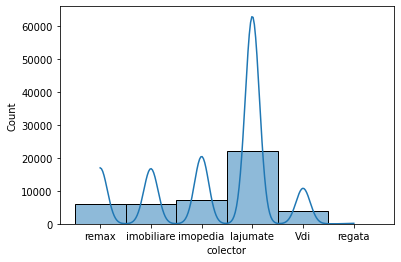

In [25]:
sns.histplot(data=national_real_estate_data,x='colector',kde=True)


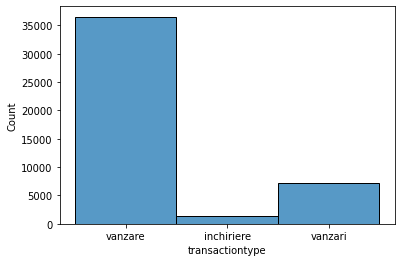

In [21]:
sns.histplot(data=national_real_estate_data,x='transactiontype')


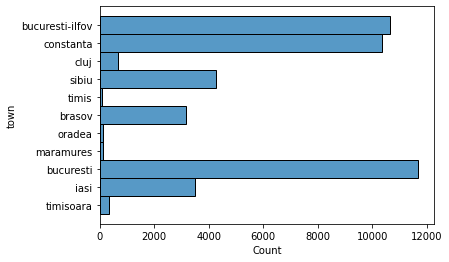

In [24]:
sns.histplot(data=national_real_estate_data,y='town')


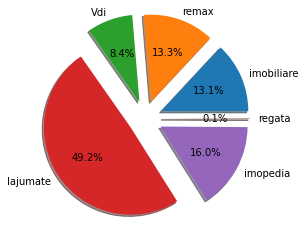

In [35]:
size_of_groups=[]
# create data
colectors = set(list(national_real_estate_data['colector'].values))
for colector in colectors:
  size_of_groups.append(len(national_real_estate_data[national_real_estate_data['colector'] == colector]))
explode = [0.2] * len(size_of_groups)
plt.pie(size_of_groups, labels = colectors,  autopct='%.1f%%',  explode=explode, shadow=True)
plt.show()

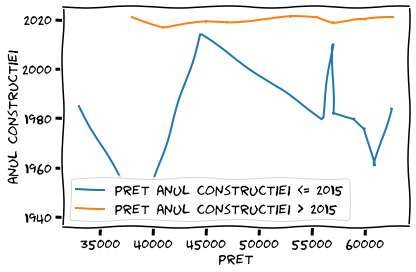

In [67]:
plt.xkcd()
nrows = 20
x_cond1 = list(national_real_estate_data_CLEANED.loc[national_real_estate_data_CLEANED['yearconstruction'] <= 2015, 'price'])
y = list(national_real_estate_data_CLEANED.loc[national_real_estate_data_CLEANED['yearconstruction'] <= 2015,  'yearconstruction'])
plt.plot(x_cond1[:nrows], y[:nrows], label='pret anul constructiei <= 2015')

x_cond2 = list(national_real_estate_data_CLEANED.loc[national_real_estate_data_CLEANED['yearconstruction'] > 2015, 'price'])
y2 = list(national_real_estate_data_CLEANED.loc[national_real_estate_data_CLEANED['yearconstruction'] > 2015, 'yearconstruction'])

plt.plot(x_cond2[:nrows], y2[:nrows], label='pret anul constructiei > 2015')

# plt.title("pret raportat la nr de camere")
plt.xlabel("pret")
plt.ylabel("anul constructiei")
plt.legend()
plt.tight_layout()
plt.show()